In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df = pd.read_csv(r"C:\Users\Avita\Downloads\OnlineRetail.csv",encoding = "latin-1")

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Label Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['Description'] = le.fit_transform(df['Description'])
df['Country'] = le.fit_transform(df['Country'])
df['InvoiceNo'] = le.fit_transform(df['InvoiceNo'])

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,85123A,3918,6,2010-12-01 08:26:00,2.55,17850.0,36
1,0,71053,3926,6,2010-12-01 08:26:00,3.39,17850.0,36
2,0,84406B,913,8,2010-12-01 08:26:00,2.75,17850.0,36
3,0,84029G,1910,6,2010-12-01 08:26:00,3.39,17850.0,36
4,0,84029E,2911,6,2010-12-01 08:26:00,3.39,17850.0,36
...,...,...,...,...,...,...,...,...
541904,22060,22613,2379,12,2011-12-09 12:50:00,0.85,12680.0,13
541905,22060,22899,743,6,2011-12-09 12:50:00,2.10,12680.0,13
541906,22060,23254,749,4,2011-12-09 12:50:00,4.15,12680.0,13
541907,22060,23255,748,4,2011-12-09 12:50:00,4.15,12680.0,13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  int32         
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  int32         
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(1)
memory usage: 26.9+ MB


In [11]:
col_names = df.columns

In [12]:
col_names

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
for i in col_names :
    if df[i].dtype=='object':
        df[i]=df[i].fillna(df[i].mode()[0])
    else:
            df[i]=df[i].fillna(df[i].mean())

In [14]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [15]:
df.duplicated().sum()

5268

In [16]:
#df= df.drop_duplicates()

In [17]:
mean_value = df['CustomerID'].mean()
df_filled = df['CustomerID'].fillna(value=mean_value)

In [18]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,85123A,3918,6,2010-12-01 08:26:00,2.55,17850.0,36
1,0,71053,3926,6,2010-12-01 08:26:00,3.39,17850.0,36
2,0,84406B,913,8,2010-12-01 08:26:00,2.75,17850.0,36
3,0,84029G,1910,6,2010-12-01 08:26:00,3.39,17850.0,36
4,0,84029E,2911,6,2010-12-01 08:26:00,3.39,17850.0,36
...,...,...,...,...,...,...,...,...
541904,22060,22613,2379,12,2011-12-09 12:50:00,0.85,12680.0,13
541905,22060,22899,743,6,2011-12-09 12:50:00,2.10,12680.0,13
541906,22060,23254,749,4,2011-12-09 12:50:00,4.15,12680.0,13
541907,22060,23255,748,4,2011-12-09 12:50:00,4.15,12680.0,13


In [19]:
df.shape

(541909, 8)

In [20]:
correlation = df.corr()
correlation

,InvoiceNo,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.024915,-0.005524,0.011919,-0.004949,-0.010606
Description,0.024915,1.000000,-0.001442,-0.011313,-0.003568,-0.011017
Quantity,-0.005524,-0.001442,1.000000,-0.001235,-0.003557,-0.012056
UnitPrice,0.011919,-0.011313,-0.001235,1.000000,-0.002830,-0.001491
CustomerID,-0.004949,-0.003568,-0.003557,-0.002830,1.000000,0.377715
Country,-0.010606,-0.011017,-0.012056,-0.001491,0.377715,1.000000


<AxesSubplot:>

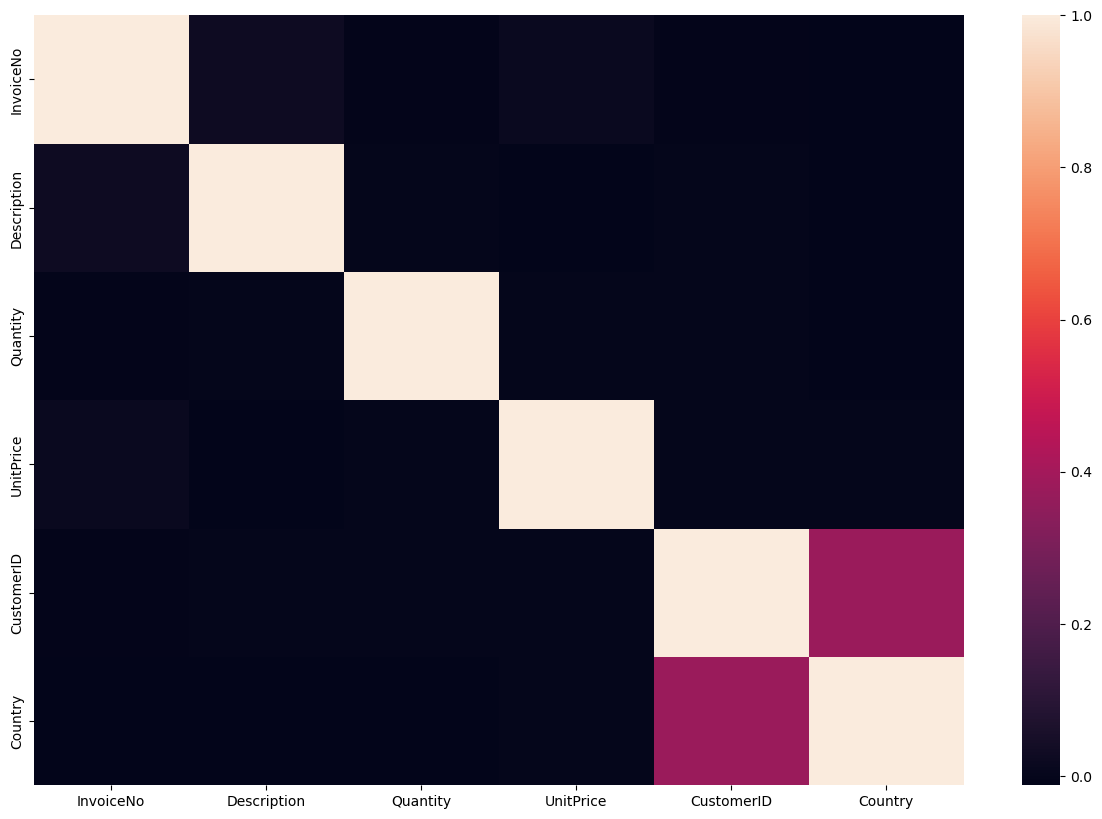

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation)

# Outliers

In [22]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [23]:
col_name = df.columns

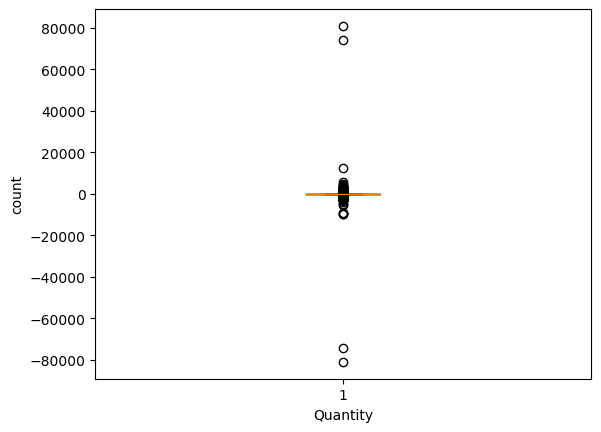

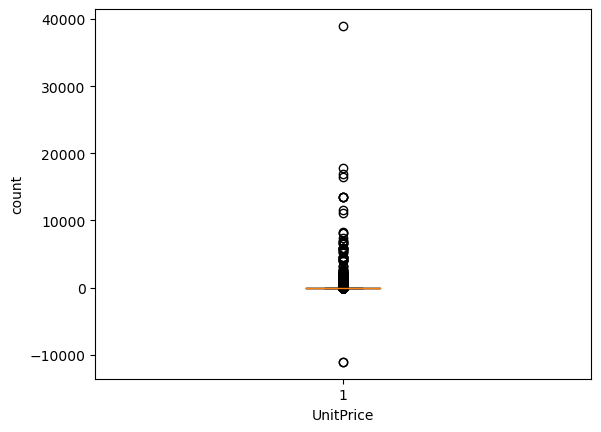

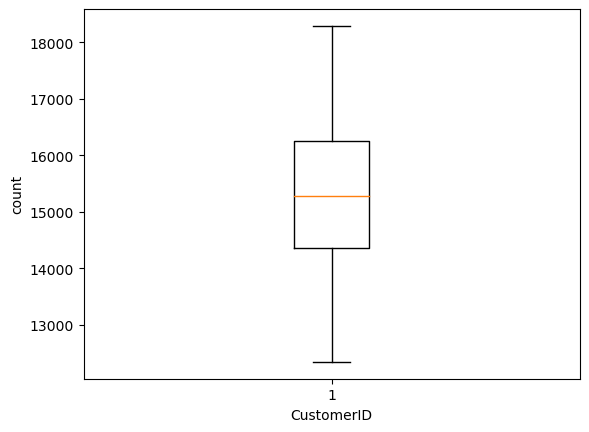

In [24]:
for col_name in col_name:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# Removing the outliers

In [25]:
col_list = 'UnitPrice','Quantity'

In [26]:
# IQR

IQR = Q3 - Q1
IQR


NameError: name 'Q3' is not defined

In [ ]:
LOWER_RANGE = Q1-1.5*IQR
UPPER_RANGE = Q3+1.5*IQR

In [ ]:
for i in col_list:
    Q1 = df[i].quantile(0.25)
    Q2 = df[i].quantile(0.50)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    LOWER_RANGE = Q1-1.5*IQR
    UPPER_RANGE = Q3+1.5*IQR
    df= df[(df[i]>= LOWER_RANGE) & (df[i]<=UPPER_RANGE)]

In [ ]:
# IQR
IQR = Q3 - Q1
IQR


In [ ]:
for col_name in col_name:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# Test Train

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x = df.drop(['StockCode','Country'],axis=1)

In [37]:
y = df['Country']

In [38]:
y

0         36
1         36
2         36
3         36
4         36
          ..
541904    13
541905    13
541906    13
541907    13
541908    13
Name: Country, Length: 541909, dtype: int32

# Splitting the data

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(433527, 6)
(108382, 6)
(433527,)
(108382,)


# Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr

LinearRegression()

In [44]:
lr.fit(x_train,y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int32]'>, <class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>)

In [45]:
predictions = df.predict(x_test)

AttributeError: 'DataFrame' object has no attribute 'predict'

In [46]:
from sklearn.metrics import *

In [47]:
r2 = r2_score(predictions,y_test)

NameError: name 'predictions' is not defined

In [48]:
r2

NameError: name 'r2' is not defined

In [49]:
rmse= mean_squared_error(predictions,y_test,squared=False)

NameError: name 'predictions' is not defined